# 数据挖掘常用模块

人们应对复杂性的最有效办法，便是分层切块。Python对于代码的组织管理，采用的是模块module的方式；也通常会将功能相近的模块打成包package进行分发，尤其是对于熟悉R语言的同学来讲，包package的概念可能更加亲切，不过python的包其实还是模块module，还是在分层切块，便于代码管理和复用。当然，除了模块和包之外，另一个概念是库library。代码库、或者说程序库对于任何语言来讲，都是通用的说法。在后续的表述中，可能模块module、包package、库library可能会交叉使用。

Python中，用于机器学习与数据挖掘的包，大致归一下类：  
* 复杂数据对象处理与探索    
  * [SciPy](https://www.scipy.org/)(#3): Scientific Python.    
  * [NumPy](https://numpy.org/)(#5): Numerical Python   
  * [Pandas](https://pandas.pydata.org/)(#8): panel data analysis, python data analysis. 
* 机器学习与数据挖掘  
  * [TensorFlow](https://tensorflow.google.cn/)(#1)：工业界使用较多  
  * [PyTorch](https://pytorch.org/)(#2)：学术界大受欢迎
  * [Keras](https://keras.io/)(#4)  
  * [Scikit-learn](https://scikit-learn.org/)(#7): 读作sy-kit learn. sci stands for science. There are multiple scikits, which are scientific toolboxes built around SciPy. You can find a list at [scikits](https://scikits.appspot.com/scikits). Apart from scikit-learn, another popular one is scikit-image. 
  * [NLTK](https://www.nltk.org/)(#9)  
  * [statsmodels](https://www.statsmodels.org/stable/index.html)  
* 数据可视化  
  * [Seaborn](https://seaborn.pydata.org/)(#6)  
  * [Matplotlib](https://matplotlib.org/)(#10): 数据可视化包MatLab-style scientific visualization  
  * [plotly](https://plot.ly/python/)  
  * [plotnine](https://plotnine.readthedocs.io/en/stable/index.html)——python里边的ggplot2，熟悉R的小伙伴可以都关注一下（虽然Python里边有同名的ggplot，但是不推荐）

上述括号中的（#1~#9）表示包的排名。关于包的排序，可以参考：  
> [Ranking Popular Python Packages for Data Science](https://github.com/thedataincubator/data-science-blogs/blob/master/python-packages.md)  
> [Top 10 Python Packages for Machine Learning](https://www.activestate.com/blog/top-10-python-machine-learning-packages/?utm_source=pycoders-weekly&utm_medium=email&utm_content=newsletter-2020-03-17-top-10-ML-packages&utm_campaign=as-blog)

关于机器学习/数据挖掘/数据科学包的生态，有人总结了下边这张图：

<img src="figtabs/ch3/scipy-ecosystem.png" width = "400" height = "400" alt="numpy_logo" align=center />

> 原图来自Jake VanderPlas @ PyCon 2017 conference

在本实验课程中，将主要用到以下模块:

* [**NumPy**](https://numpy.org/) and [**Pandas**](https://pandas.pydata.org/)：加载数据、数据预处理
* [**Matplotlib**](https://matplotlib.org/) and [**Seaborn**](https://seaborn.pydata.org/)：数据可视化、探索性分析  
* [**Scikit-learn**](https://scikit-learn.org/)：算法模型

🌈🌈🌈🌈  **Time to Play**  ✨✨✨✨

小伙伴们可以思考一下：不同的模块，能挂在下边这个通用流程的那个环节？

<img src="figtabs/ch3/CRISP-DM.png" width = "400" height = "400" alt="numpy_logo" align=center />

Python之所以强大，是因为有一个好的生态。[几十万个包](https://pypi.org/)，让Python几乎无所不能。对于开源生态而言，第三方扩展模块和标准模块一样重要，甚至更加重要。对于这些关键的少数，切不可等闲视之，更不要认为标准模块是根本，其他的第三方模块只是锦上添花而已；同时，也不要把这些关键的少数当成芸芸众生之一，因为像numpy/pandas等，确实改变了这个生态本身

再重复一下前边的观点：做数据挖掘实验，和其他实验有本质不同，主要的材料不是什么试剂，而是数据。数据对象是重中之重！Python中的数据对象，并不像其他一些编程语言，如R之类的，把核心的数据对象都内置了。Python中重要的数据对象，在第三方模块中也有分布，接下来便要着重阐述numpy中的多维数据这一数据对象。

# 数组与向量化计算：numpy

numpy = **Num**erical **Py**thon

<img src="figtabs/ch3/numpy_logo.svg" width = "100" height = "100" alt="numpy_logo" align=center />

NumPy是 Python 提供进行科学计算的基础模块，提供了快速高效的向量化计算，以及线性代数等高级矩阵运算功能。可以毫不夸张的说，NumPy是Python数值计算最重要的基础包。大多数提供科学计算的包都是用NumPy的数组作为构建基础。Python之所以能在科学计算上独领风骚很大程度上就是因为这个库。  

NumPy的部分功能如下：
* 一个具有矢量算术运算和复杂广播能力的快速且节省空间的多维数组ndarray（N-dimensional array object）。
* 用于对整组数据进行快速运算的数学运算。向量化运算，无需编写循环。提供了大量的标准数学函数ufunc(universal function object)。
* 用于读写磁盘数据的工具以及用于操作内存映射文件的工具。
* 实用的线性代数、傅里叶变换和随机数生成函数。numpy和稀疏矩阵运算包scipy配合使用更加方便。
* 用于整合C/C++和Fortran代码的工具包。

NumPy本身并没有提供多么高级的数据分析功能，理解NumPy数组以及面向数组的计算将有助于你更加高效地使用诸如pandas之类的工具。很多机器学习库都是基于numpy。

NumPy之于数值计算特别重要的原因之一，是因为它可以高效处理大数组的数据。这是因为：
* NumPy是在一个连续的内存块中存储数据，独立于其他Python内置对象。
* NumPy的C语言编写的算法库可以操作内存，而不必进行类型检查或其它前期工作。比起Python的内置序列，NumPy数组使用的内存更少。
* NumPy可以在整个数组上执行复杂的计算，而不需要Python的for循环。

当然，最核心的一条，Numpy数组对象相对于内置对象而言，带来了观念上的转变：不再是计算机数据的存储与组织，而是站在数学的角度、计算的角度思考问题。

In [1]:
# 在Jupyter中，除非加上print，每个cell只会显示最后一个输出结果
# 通过加上如下代码，使之打印所有的交互式输出，而不仅仅是最后一个
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np

my_arr = np.arange(100000)
my_list = list(range(100000))

In [3]:
my_arr
my_list[:10]

array([    0,     1,     2, ..., 99997, 99998, 99999])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

各个序列分别乘以2：

In [4]:
%timeit for _ in range(100): my_arr2 = my_arr * 2

3.98 ms ± 32.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [5]:
 %timeit for _ in range(100): my_list2 = [x * 2 for x in my_list]

303 ms ± 9.39 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


基于NumPy的算法要比纯Python快10到100倍（甚至更快），并且使用的内存更少。除了内存使用和时间效率外，对于大部分R或Matlab的用户而言，numpy所体现出来的面向数组的编程和思维方式，将会赶到特别亲切。

## NumPy的ndarray：一种多维数组对象

ndarray: N-dimensional array object

NumPy最重要的一个特点就是其N维数组对象（即ndarray）。毫无疑问，NumPy中的数组是开展机器学习、数据挖掘最需要掌握的数据对象（之一）。实际上，numpy中的数组和前一章的list，是众多模块（包括深度学习等在内）进行数据共享交流的数据载体容器

先来看一下利用数组对整块数据执行一些数学运算，其语法跟标量元素之间的运算一样。

In [6]:
import numpy as np

In [7]:
x = list(range(1, 11))
x

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [8]:
[10 * c for c in x]

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [9]:
x * 2

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [10]:
arange1 = np.arange(1, 11)

注意是array range, 不是arrange

In [11]:
arange1 * 10

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [12]:
data = np.random.randn(2, 3)
data

array([[-1.95042214, -0.66794283,  1.01011454],
       [ 0.41009926, -0.01847259, -1.09822646]])

In [13]:
data * 10

array([[-19.5042214 ,  -6.6794283 ,  10.10114545],
       [  4.10099257,  -0.18472586, -10.9822646 ]])

In [14]:
data + data

array([[-3.90084428, -1.33588566,  2.02022909],
       [ 0.82019851, -0.03694517, -2.19645292]])

In [15]:
listA = [1, 2, 3, 4]
listB = [5, 6, 7, 8]
listA + listB

[1, 2, 3, 4, 5, 6, 7, 8]

In [16]:
listA * 3

[1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4]

In [17]:
arrA = np.array([1, 2, 3, 4])
arrB = np.array([5, 6, 7, 8])
arrA + arrB

array([ 6,  8, 10, 12])

In [18]:
arrA * 3

array([ 3,  6,  9, 12])

第一个例子中，所有的元素都乘以10。第二个例子中，每个元素都与自身相加

ndarray是一个通用的同构数据多维容器，也就是说，其中的所有元素必须是相同类型的。每个数组都有一个shape（一个表示各维度大小的元组）和一个dtype（一个用于说明数组数据类型的对象）：

In [19]:
data.shape

(2, 3)

In [20]:
data.dtype

dtype('float64')

### 创建ndarray

创建数组最简单的办法就是使用array函数。它接受一切序列型的对象（包括其他数组），然后产生一个新的含有传入数据的NumPy数组。以一个列表的转换为例：

In [21]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

上述代码基于列表进行数组的创建。实际上，数组很像列表，包括后续要讲到的元素访问、切片等操作，几乎都可以参照列表来进行。

嵌套序列（比如由一组等长列表组成的列表）将会被转换为一个多维数组：

In [22]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

因为data2是列表的列表，NumPy数组arr2的两个维度的shape是从data2引入的。可以用属性ndim和shape验证：

In [23]:
arr2.ndim

2

In [24]:
arr2.shape

(2, 4)

ndarray一些基本属性：  
* ndim: 维度数量
* shape: 是一个表示各维度大小的元组，即数组的形状
* dtype: 一个用于说明数组元素数据类型的对象
* size: 元素总个数，即shape中各数组相乘

除非特别说明（稍后将会详细介绍），np.array会尝试为新建的这个数组推断出一个较为合适的数据类型。数据类型保存在一个特殊的dtype对象中。比如说，在上面的两个例子中，我们有：

In [25]:
arr1.dtype

dtype('float64')

In [26]:
arr2.dtype

dtype('int32')

除np.array之外，还有一些函数也可以新建数组。比如，zeros和ones分别可以创建指定长度或形状的全0或全1数组。empty可以创建一个没有任何具体值的数组。要用这些方法创建多维数组，只需传入一个表示形状的元组即可：

In [27]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [29]:
np.empty((2, 3, 2))

array([[[1.01855798e-312, 1.06099790e-312],
        [1.01855798e-312, 9.54898106e-313],
        [1.18831764e-312, 1.01855798e-312]],

       [[1.23075756e-312, 1.14587773e-312],
        [1.08221785e-312, 9.76118064e-313],
        [1.10343781e-312, 1.90979621e-312]]])

简单归纳一下：  
* array函数：接收一个普通的Python序列，转成ndarray
* zeros函数：创建指定长度或形状的全零数组
* ones函数：创建指定长度或形状的全1数组
* empty函数：创建一个没有任何具体值的数组（准确地说是一些未初始化的垃圾值）

arange是Python内置函数range的数组版：

In [30]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

数组的其他一些创建方式：  
* **arrange**：类似于python的range函数，通过指定开始值、终值和步长来创建一维数组，注意数组不包括终值
* **linspace**：通过指定开始值、终值和元素个数来创建一维数组（等差数列），可以通过endpoint关键字指定是否包括终值，缺省设置是包括终值
* **logspace**：和linspace类似，不过它创建等比数列
* 使用随机数填充数组，即使用numpy.random模块的random()函数，数组所包含的的元素数量由参数决定

下表是《Python基础教程》列举的创建数组常用方法：

![img](figtabs/ch3/python_for_data_analysis_table4.1.png)

### ndarray的数据类型

dtype（数据类型）是一个特殊的对象，它含有ndarray将一块内存解释为特定数据类型所需的信息：

In [31]:
arr1 = np.array([1, 2, 3], dtype=np.float64)

In [32]:
arr2 = np.array([1, 2, 3], dtype=np.int32)

In [33]:
arr1.dtype

dtype('float64')

In [34]:
arr2.dtype

dtype('int32')

数值型dtype的命名方式相同：一个类型名（如float或int），后面跟一个用于表示各元素位长的数字。标准的双精度浮点值（即Python中的float对象）需要占用8字节（即64位）。因此，该类型在NumPy中就记作float64

numpy中的dtype如下：

<img src="figtabs/ch3/python_for_data_analysis_table4.2.png" width = "500" height = "500" align="center" />

下图显示了主要类型之间的关系：

<img src="figtabs/ch3/dtype.jpg" width = "500" height = "500" align=center />

可以通过ndarray的astype方法明确地将一个数组从一个dtype转换成另一个dtype。有需要的时候，我们可以进行下述转换以节省空间： 
* int64-->int32
* float64-->float32

这里的8/16/32/64表示占用字节数，比如，对于整型而言：  
* int8，字节（-128 ~ 127），1个字节
* int16，整型（-32768 ~ 32767），2个字节
* int32，整型（-2147483648 ~ 2147483647），4个字节
* int64，整型（- 9223372036854775808~9223372036854775807），8字节

再比如，对于浮点数而言：  
* float16：符号位，5位指数，10位小数部分
* float32：符号位，8位指数，23位小数部分
* float64：符号位，11位指数，52位小数部分

又比如，对于复数而言：  
* complex64：由两个32位的浮点数来表示（实数部分和虚数部分）
* complex128：由两个64位的浮点数来表示（实数部分和虚数部分）

也有一些简写的方式：  
* int_：默认整型（与C中的long相同，通常为int64或者int32）
* float_：float64的简写形式
* comlex_：complex128的简写形式

其实，大部分时候，我们都无需关注这些细节。

In [35]:
arr = np.array([1, 2, 3, 4, 5])

In [36]:
arr.dtype

dtype('int32')

In [37]:
float_arr = arr.astype(np.float64)

In [38]:
float_arr.dtype

dtype('float64')

如果将浮点数转换成整数，则小数部分将会被截取删除：

In [39]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10])

如果某字符串数组表示的全是数字，也可以用astype将其转换为数值形式：

In [40]:
numeric_strings = np.array(["1.25", "-9.6", "42"], dtype=np.string_)
numeric_strings

array([b'1.25', b'-9.6', b'42'], dtype='|S4')

In [41]:
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

### NumPy数组的运算

数组很重要，因为它使你不用编写循环即可对数据执行批量运算。NumPy用户称其为向量化（vectorization）。大小相等的数组之间的任何算术运算都会将运算应用到元素级：

In [42]:
arr = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [43]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [44]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

数组与标量的算术运算会将标量值传播到各个元素：

In [45]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [46]:
arr**0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

大小相同的数组之间的比较会生成布尔值数组：

In [47]:
arr2 = np.array([[0.0, 4.0, 1.0], [7.0, 2.0, 12.0]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [48]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

### 基本的索引和切片

NumPy数组的索引是一个内容丰富的主题，因为选取数据子集或单个元素的方式有很多。一维数组很简单。从表面上看，它们跟Python列表的功能差不多：

In [49]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [50]:
arr[5:8]

array([5, 6, 7])

In [51]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

如上所示，当你将一个标量值赋值给一个切片时（如arr[5:8]=12），该值会自动传播到整个选区。跟列表最重要的区别在于，数组切片是原始数组的视图。这意味着数据不会被复制，视图上的任何修改都会直接反映到源数组上。

In [52]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

当我修改arr_slice中的值，变动也会体现在原始数组arr中：

In [53]:
arr_slice[1] = 12345

In [54]:
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

切片[ : ]会给数组中的所有值赋值：

In [55]:
arr_slice[:] = 64

In [56]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

如果你刚开始接触NumPy，可能会对此感到惊讶（比如和R语言相比）。由于NumPy的设计目的是处理大数据，所以你可以想象一下，假如NumPy坚持要将数据复制来复制去的话会产生何等的性能和内存问题。

对于高维度数组，能做的事情更多。在一个二维数组中，各索引位置上的元素不再是标量而是一维数组：

In [57]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [58]:
arr2d[2]

array([7, 8, 9])

因此，可以对各个元素进行递归访问，但这样需要做的事情有点多。你可以传入一个以逗号隔开的索引列表来选取单个元素。也就是说，下面两种方式是等价的：

In [59]:
arr2d[0][2]

3

In [60]:
arr2d[0, 2]

3

下图说明了说明了二维数组的索引方式。轴0作为行，轴1作为列。

![img](figtabs/ch3/python_for_data_analysis_figure4.1.png)

在多维数组中，如果省略了后面的索引，则返回对象会是一个维度低一点的
ndarray（它含有高一级维度上的所有数据）。因此，在2×2×3数组arr3d中：

In [61]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

In [62]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

arr3d[0]是一个2×3数组：

In [63]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [64]:
arr3d[1, 1]

array([10, 11, 12])

In [65]:
arr3d[0, :, 2]

array([3, 6])

标量值和数组都可以被赋值给arr3d[0]：

In [66]:
old_values = arr3d[0].copy()

In [67]:
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [68]:
arr3d[1] = 24
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[24, 24, 24],
        [24, 24, 24]]])

相似的，arr3d[1,0]可以访问索引以(1,0)开头的那些值（以一维数组的形式返回）：

In [69]:
arr3d[1, 0]

array([24, 24, 24])

虽然是用两步进行索引的，表达式是相同的：

In [70]:
x = arr3d[1]
x

array([[24, 24, 24],
       [24, 24, 24]])

In [71]:
x[0]

array([24, 24, 24])

### 切片索引

ndarray的切片语法跟Python列表这样的一维对象差不多：

In [72]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

对于之前的二维数组arr2d，其切片方式稍显不同：

In [73]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [74]:
arr2d[1:2, 1:2]

array([[5]])

In [75]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [76]:
arr2d[:, 0]

array([1, 4, 7])

In [77]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

可以看出，它是沿着第0轴（即第一个轴）切片的。也就是说，切片是沿着一个轴向选取元素的。表达式arr2d[:2]可以被认为是“选取arr2d的前两行”。  
你可以一次传入多个切片，就像传入多个索引那样：

In [78]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

像这样进行切片时，只能得到相同维数的数组视图。通过将整数索引和切片混合，可以得到低维度的切片。  
例如，我可以选取第二行的前两列：

In [79]:
arr2d[1, :2]

array([4, 5])

“只有冒号”表示选取整个轴，因此你可以像下面这样只对高维轴进行切片：

In [80]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [81]:
arr2d[:, :1].shape

(3, 1)

![img](figtabs/ch3/python_for_data_analysis_figure4.2.png)

### 布尔型索引

来看这样一个例子，假设我们有一个用于存储数据的数组以及一个存储姓名的数组（含有重复项）。在这里，我将使用numpy.random中的randn函数生成一些正态分布的随机数据：

In [82]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [83]:
data = np.random.randn(7, 4)
data

array([[-2.40887801,  0.79657519,  0.2397513 ,  1.04215049],
       [-1.24452559, -1.86672095,  1.50194206, -0.18513334],
       [ 1.46290615, -0.22977566, -0.98158302, -1.01892123],
       [ 0.42767397,  0.15869758,  0.34307335,  0.6674764 ],
       [-1.32723349, -0.21955929,  0.52195045, -1.81245152],
       [-0.26892212,  0.78453595,  1.69456408,  1.64855032],
       [ 0.15542306, -0.65997025, -1.1218956 ,  0.74217221]])

In [84]:
data = np.random.randn(7, 4)
data

array([[-0.17377214, -0.39067594,  0.98731458,  0.13753327],
       [-0.74621501, -0.78113054, -0.86228443, -1.73169924],
       [-0.73912153,  0.94412778,  1.81655644, -0.4676298 ],
       [-2.40003431, -1.60200054,  0.35675017,  1.93906125],
       [ 0.63826391,  1.46633756,  0.77698706, -0.83332383],
       [-0.7007514 ,  1.32408744, -1.38772237, -1.40360454],
       [-1.63671857, -0.12703797,  0.11610462, -0.35832306]])

假设每个名字都对应data数组中的一行，而我们想要选出对应于名字"Bob"的所有行。跟算术运算一样，数组的比较运算（如==）也是矢量化的。因此，对names和字符串"Bob"的比较运算将会产生一个布尔型数组：

In [85]:
names == "Bob"

array([ True, False, False,  True, False, False, False])

这个布尔型数组可用于数组索引：

In [86]:
data[names == "Bob"]

array([[-0.17377214, -0.39067594,  0.98731458,  0.13753327],
       [-2.40003431, -1.60200054,  0.35675017,  1.93906125]])

布尔型数组的长度必须跟被索引的轴长度一致。此外，还可以将布尔型数组跟切片、整数混合使用：

In [87]:
data[names == "Bob"]

array([[-0.17377214, -0.39067594,  0.98731458,  0.13753327],
       [-2.40003431, -1.60200054,  0.35675017,  1.93906125]])

In [88]:
data[names == "Bob", 2:]

array([[0.98731458, 0.13753327],
       [0.35675017, 1.93906125]])

要选择除"Bob"以外的其他值，既可以使用不等于符号（!=），也可以通过~对条件进行否定：

In [89]:
names != "Bob"

array([False,  True,  True, False,  True,  True,  True])

In [90]:
data[~(names == "Bob")]

array([[-0.74621501, -0.78113054, -0.86228443, -1.73169924],
       [-0.73912153,  0.94412778,  1.81655644, -0.4676298 ],
       [ 0.63826391,  1.46633756,  0.77698706, -0.83332383],
       [-0.7007514 ,  1.32408744, -1.38772237, -1.40360454],
       [-1.63671857, -0.12703797,  0.11610462, -0.35832306]])

~操作符用来反转条件很好用：

In [91]:
cond = names == "Bob"

In [92]:
data[~cond]

array([[-0.74621501, -0.78113054, -0.86228443, -1.73169924],
       [-0.73912153,  0.94412778,  1.81655644, -0.4676298 ],
       [ 0.63826391,  1.46633756,  0.77698706, -0.83332383],
       [-0.7007514 ,  1.32408744, -1.38772237, -1.40360454],
       [-1.63671857, -0.12703797,  0.11610462, -0.35832306]])

选取这三个名字中的两个需要组合应用多个布尔条件，使用&（和）、|（或）之类的布尔算术运算符即可（Python关键字and和or在布尔型数组中无效。要使用&与|）：

In [93]:
mask = (names == "Bob") | (names == "Will")
mask

array([ True, False,  True,  True,  True, False, False])

In [94]:
data[mask]

array([[-0.17377214, -0.39067594,  0.98731458,  0.13753327],
       [-0.73912153,  0.94412778,  1.81655644, -0.4676298 ],
       [-2.40003431, -1.60200054,  0.35675017,  1.93906125],
       [ 0.63826391,  1.46633756,  0.77698706, -0.83332383]])

通过布尔型数组设置值是一种经常用到的手段。为了将data中的所有负值都设置为0，我们只需：

In [95]:
data[data < 0] = 0
data

array([[0.        , 0.        , 0.98731458, 0.13753327],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.94412778, 1.81655644, 0.        ],
       [0.        , 0.        , 0.35675017, 1.93906125],
       [0.63826391, 1.46633756, 0.77698706, 0.        ],
       [0.        , 1.32408744, 0.        , 0.        ],
       [0.        , 0.        , 0.11610462, 0.        ]])

通过一维布尔数组设置整行或列的值也很简单：

In [96]:
data[names != "Joe"] = 7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 1.32408744, 0.        , 0.        ],
       [0.        , 0.        , 0.11610462, 0.        ]])

### 花式索引

花式索引（Fancy indexing）是一个NumPy术语，它指的是利用整数数组进行索引。假设我们有一个8×4数组：

In [97]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

为了以特定顺序选取行子集，只需传入一个用于指定顺序的整数列表或ndarray即可：

In [98]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

使用负数索引将会从末尾开始选取行：

In [99]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

一次传入多个索引数组会有一点特别。它返回的是一个一维数组，其中的元素对应各个索引元组：

In [100]:
import numpy as np

In [101]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [102]:
np.arange(32).reshape((4, 4, 2))

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15]],

       [[16, 17],
        [18, 19],
        [20, 21],
        [22, 23]],

       [[24, 25],
        [26, 27],
        [28, 29],
        [30, 31]]])

In [103]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

最终选出的是元素(1,0)、(5,3)、(7,1)和(2,2)。无论数组是多少维的，花式索引总是一维的。  
这个花式索引的行为可能会跟我们的预期不一样，选取矩阵的行列子集应该是矩形区域的形式才对。下面是得到该结果的一个办法：

In [104]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

花式索引跟切片不一样，它总是将数据复制到新数组中。

### 数组转置和轴对换

转置是重塑的一种特殊形式，它返回的是源数据的视图（不会进行任何复制操作）。数组不仅有transpose方法，还有一个特殊的T属性：

In [105]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [106]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [107]:
np.arange(24).reshape((3, 2, 4))

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]],

       [[16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [108]:
np.arange(24).reshape((3, 2, 4)).T

array([[[ 0,  8, 16],
        [ 4, 12, 20]],

       [[ 1,  9, 17],
        [ 5, 13, 21]],

       [[ 2, 10, 18],
        [ 6, 14, 22]],

       [[ 3, 11, 19],
        [ 7, 15, 23]]])

在进行矩阵计算时，经常需要用到该操作，比如利用np.dot计算矩阵内积：

In [109]:
arr = np.random.randn(6, 3)
arr

array([[ 0.39139559,  2.25244339, -0.06931013],
       [ 1.26919133, -1.40476743,  0.67385671],
       [ 0.40941457,  1.75544594, -0.30492639],
       [ 0.92026321,  2.04761849,  0.09050008],
       [ 0.11728188,  1.33461863,  0.67060964],
       [ 1.20408045, -1.67462236, -0.70635354]])

In [110]:
np.dot(arr.T, arr)

array([[ 4.24210656e+00, -1.58122593e-01,  1.47118688e-02],
       [-1.58122593e-01,  1.89067716e+01,  6.25182289e-01],
       [ 1.47118688e-02,  6.25182289e-01,  1.50870975e+00]])

### 数组的迭代操作

In [111]:
arr = np.array([[1, 2], [3, 4], [5, 6]], float)
for x in arr:
    print(x)

[1. 2.]
[3. 4.]
[5. 6.]


In [112]:
arr = np.array([[1, 2], [3, 4], [5, 6]], float)
for (x, y) in arr:
    print(x, "*", y, " = ", x * y)

1.0 * 2.0  =  2.0
3.0 * 4.0  =  12.0
5.0 * 6.0  =  30.0


### 通用函数：快速的元素级数组函数

ufunc: Universal Functions

通用函数（即ufunc）是一种对ndarray中的数据执行元素级运算的函数。你可以将其看做简单函数（接受一个或多个标量值，并产生一个或多个标量值）的矢量化包装器。  
许多ufunc都是简单的元素级变体，如sqrt和exp：

In [113]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [114]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [115]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

这些都是一元（unary）ufunc。另外一些（如add或maximum）接受2个数组（因此也叫二元（binary）ufunc），并返回一个结果数组：

In [116]:
x = np.random.randn(8)
x

array([ 1.28893839,  1.87022287, -0.78682775, -0.53431612,  0.05762878,
        1.9639311 ,  1.13891752,  1.56807842])

In [117]:
y = np.random.randn(8)
y

array([ 0.18191405,  1.17745872, -0.570851  ,  0.65677518,  1.19245143,
       -0.30981729, -0.40923189, -0.02552541])

In [118]:
np.maximum(x, y)

array([ 1.28893839,  1.87022287, -0.570851  ,  0.65677518,  1.19245143,
        1.9639311 ,  1.13891752,  1.56807842])

以下分别是一元和二元ufunc：<br/>
![img](figtabs/ch3/python_for_data_analysis_table4.3.png)<br/>
![img](figtabs/ch3/python_for_data_analysis_table4.4.png)

## 利用数组进行数据处理

NumPy数组使你可以将许多种数据处理任务表述为简洁的数组表达式（否则需要编写循环）。用数组表达式代替循环的做法，通常被称为向量化。一般来说，向量化数组运算要比等价的纯Python方式快上一两个数量级（甚至更多），尤其是各种数值计算。

In [119]:
points1 = np.arange(1, 4)
points1
points2 = np.arange(5, 7)
points2

array([1, 2, 3])

array([5, 6])

In [120]:
xs, ys = np.meshgrid(points1, points2)
xs

array([[1, 2, 3],
       [1, 2, 3]])

In [121]:
ys

array([[5, 5, 5],
       [6, 6, 6]])

np.meshgrid函数接受两个一维数组，并产生两个二维矩阵，对应于两个数组中所有的(x,y)对）：  
(1, 5) (2, 5) (3, 5)  
(1, 6) (2, 6) (3, 6)

In [122]:
import numpy as np

points = np.arange(-5, 5, 0.01)
points[:5]

array([-5.  , -4.99, -4.98, -4.97, -4.96])

In [123]:
xs, ys = np.meshgrid(points, points)
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [124]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

现在，对该函数的求值运算就好办了，把这两个数组当做两个浮点数那样编写表达式即可：

In [125]:
z = np.sqrt(xs**2 + ys**2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

用matplotlib创建了这个二维数组的可视化：

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

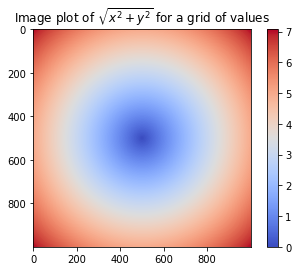

In [126]:
import matplotlib.pyplot as plt

plt.imshow(z, cmap='coolwarm')
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.show()

🌈🌈🌈🌈  **Time to Play**  ✨✨✨✨

另一个典型场景是求取二维概率密度估计：给定一组在二维空间中观测到的数据点，估计二维空间的概率密度。

加载相应的包：

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

生成数据——当然也可以是实际观测到的数据：

In [128]:
xy = np.random.randn(10, 2)
x = xy[:, 0]
y = xy[:, 1]

绘制数据的现有分布

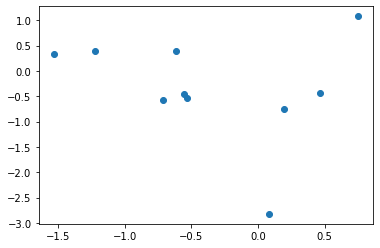

In [129]:
plt.scatter(x, y)

In [130]:
xmin = min(x)
xmax = max(x)
ymin = min(y)
ymax = max(y)

生成数据网格：

In [131]:
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])

进行核密度估计

In [132]:
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

绘制核密度图：

(-1.532803150785606, 0.75174025315517)

(-2.8208140302762628, 1.0793178580297895)

<a list of 9 text.Text objects>

Text(0.5, 0, 'X')

Text(0, 0.5, 'Y')

Text(0.5, 1.0, '2D Gaussian Kernel density estimation')

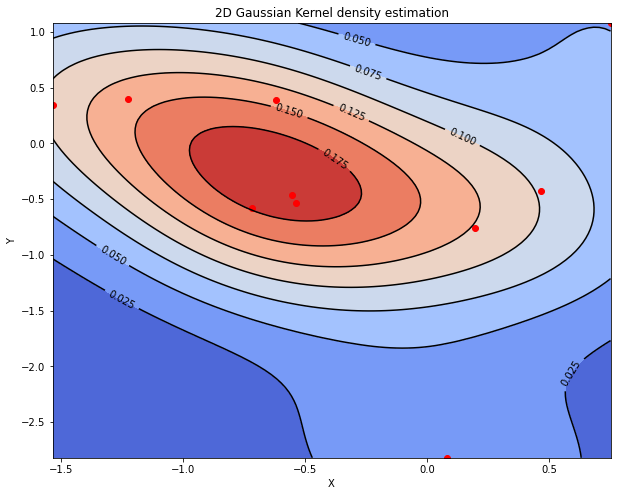

In [133]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.scatter(x, y, color='r')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')

### 将条件逻辑表述为数组运算

numpy.where函数是三元表达式x if condition else y的矢量化版本。假设我们有一个布尔数组和两个值数组：

In [134]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

假设我们想要根据cond中的值选取xarr和yarr的值：当cond中的值为True时，选取xarr的值，否则从yarr中选取。

In [135]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

np.where函数是三元表达式 x if condition else y的矢量化版本（或者说向量化版本，矢量化、向量化将在课程中交替使用）。

np.where的第二个和第三个参数不必是数组，它们都可以是标量值。在数据分析工作中，where通常用于根据另一个数组而产生一个新的数组。假设有一个由随机数据组成的矩阵，你希望将所有正值替换为2，将所有负值替换为－2。若利用np.where，则会非常简单：

In [136]:
arr = np.random.randn(4, 4)
arr

array([[ 1.96617187,  0.14986225,  0.70764931, -1.81906136],
       [-1.55702283, -1.72610306,  0.50242825, -0.39747942],
       [-0.37390454, -0.40321159, -2.00441255, -2.64403055],
       [-1.22687298, -0.56997789,  0.05511091,  3.13731229]])

In [137]:
arr > 0

array([[ True,  True,  True, False],
       [False, False,  True, False],
       [False, False, False, False],
       [False, False,  True,  True]])

In [138]:
np.where(arr > 0, 2, -2)

array([[ 2,  2,  2, -2],
       [-2, -2,  2, -2],
       [-2, -2, -2, -2],
       [-2, -2,  2,  2]])

使用np.where，可以将标量和数组结合起来。例如，我可用常数2替换arr中所有正的值：

In [139]:
np.where(arr > 0, 2, arr)

array([[ 2.        ,  2.        ,  2.        , -1.81906136],
       [-1.55702283, -1.72610306,  2.        , -0.39747942],
       [-0.37390454, -0.40321159, -2.00441255, -2.64403055],
       [-1.22687298, -0.56997789,  2.        ,  2.        ]])

### 数学和统计方法

先来看一下简单的数学运算

In [140]:
x = [3.14159, 2.71828]

In [141]:
x = np.array(x)

In [142]:
x.round()

array([3., 3.])

In [143]:
np.round(x)

array([3., 3.])

In [144]:
x = x * 1000

In [145]:
np.round(x, -2)

array([3100., 2700.])

In [146]:
np.floor(x)

array([3141., 2718.])

In [147]:
np.ceil(x)

array([3142., 2719.])

可以通过数组上的一组数学函数对整个数组或某个轴向的数据进行统计计算。sum、mean以及标准差std等聚合计算（aggregation，通常叫做约简
（reduction））既可以当做数组的实例方法调用，也可以当做顶级NumPy函数使用。  
这里，我生成了一些正态分布随机数据，然后进行统计：

In [148]:
import numpy as np

In [149]:
arr = np.random.randn(5, 4)
arr

array([[ 0.36384551,  0.21654445, -0.88389726,  0.17284372],
       [-2.16491843, -0.61921757,  0.30314628, -1.83936414],
       [-0.39263133, -1.57065911,  1.6312532 , -1.99397164],
       [-0.71187108, -0.77083282,  0.74937498, -0.58396196],
       [-1.57641522,  0.5543585 ,  0.04800083, -0.61767936]])

In [150]:
arr.mean()

-0.4843026230043944

In [151]:
np.mean(arr)

-0.4843026230043944

In [152]:
arr.sum()

-9.686052460087888

mean和sum这类的函数可以接受一个axis选项参数，用于计算该轴向上的统计值，最终结果是一个少一维的数组：

In [153]:
arr.sum(axis=1)

array([-0.13066358, -4.32035386, -2.32600889, -1.31729088, -1.59173525])

In [154]:
arr

array([[ 0.36384551,  0.21654445, -0.88389726,  0.17284372],
       [-2.16491843, -0.61921757,  0.30314628, -1.83936414],
       [-0.39263133, -1.57065911,  1.6312532 , -1.99397164],
       [-0.71187108, -0.77083282,  0.74937498, -0.58396196],
       [-1.57641522,  0.5543585 ,  0.04800083, -0.61767936]])

In [155]:
arr.cumsum(axis=0)

array([[ 0.36384551,  0.21654445, -0.88389726,  0.17284372],
       [-1.80107291, -0.40267312, -0.58075098, -1.66652042],
       [-2.19370425, -1.97333223,  1.05050221, -3.66049207],
       [-2.90557533, -2.74416505,  1.7998772 , -4.24445403],
       [-4.48199055, -2.18980655,  1.84787803, -4.86213339]])

In [156]:
list12 = list(range(0, 12))

In [157]:
list12

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

```python
arr([[x00, x01, x02, x03],
    [x10, x11, x12, x13],
    [x20, x21, x22, x23],
    [x30, x31, x32, x33],
    [x40, x41, x42, x43],])
```

这里，arr.mean(1)是“计算行的平均值”，arr.sum(0)是“计算每列的和”

这里的操作规则，可能初次接触时会有疑问，尤其是纠结于axis究竟代表行还是列时更难理解  

--- 
其实规则很简单：设axis=i，则Numpy沿着第i个下标变化的方向进行操作

In [158]:
import numpy as np

In [159]:
arr1 = (np.arange(24) + 1).reshape((3, 2, 4))

In [160]:
arr1

array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8]],

       [[ 9, 10, 11, 12],
        [13, 14, 15, 16]],

       [[17, 18, 19, 20],
        [21, 22, 23, 24]]])

In [161]:
arr1[0, 1, 2]

7

In [162]:
arr1[0][1][2]

7

In [163]:
arr1.mean(axis=0)

array([[ 9., 10., 11., 12.],
       [13., 14., 15., 16.]])

In [164]:
arr1.mean(axis=1)

array([[ 3.,  4.,  5.,  6.],
       [11., 12., 13., 14.],
       [19., 20., 21., 22.]])

In [165]:
arr1.mean(axis=2)

array([[ 2.5,  6.5],
       [10.5, 14.5],
       [18.5, 22.5]])

In [166]:
arr1

array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8]],

       [[ 9, 10, 11, 12],
        [13, 14, 15, 16]],

       [[17, 18, 19, 20],
        [21, 22, 23, 24]]])

下边这个例子，可能更加容易说明问题：

In [167]:
arr2 = np.ones(24).reshape((3, 2, 4))

In [168]:
arr2

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

🌈🌈🌈🌈  **Time to Play**  ✨✨✨✨

思考一下：
```python 
arr2[i, j, k]
```  
中的i、j、k分别代表什么？

In [169]:
arr2.cumsum(axis=0)

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[2., 2., 2., 2.],
        [2., 2., 2., 2.]],

       [[3., 3., 3., 3.],
        [3., 3., 3., 3.]]])

In [170]:
arr2

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

In [171]:
arr2.cumsum(axis=1)

array([[[1., 1., 1., 1.],
        [2., 2., 2., 2.]],

       [[1., 1., 1., 1.],
        [2., 2., 2., 2.]],

       [[1., 1., 1., 1.],
        [2., 2., 2., 2.]]])

In [172]:
arr2

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

In [173]:
arr2.cumsum(axis=2)

array([[[1., 2., 3., 4.],
        [1., 2., 3., 4.]],

       [[1., 2., 3., 4.],
        [1., 2., 3., 4.]],

       [[1., 2., 3., 4.],
        [1., 2., 3., 4.]]])

一些常用的统计方法：

![img](figtabs/ch3/python_for_data_analysis_table4.5.png)

### 用于布尔型数组的方法

在上面这些方法中，布尔值会被强制转换为1（True）和0（False）。因此，sum经常被用来对布尔型数组中的True值计数：

In [174]:
arr = np.random.randn(100)
(arr > 0).sum()

52

另外还有两个方法any和all，它们对布尔型数组非常有用。any用于测试数组中是否存在一个或多个True，而all则检查数组中所有值是否都是True：

In [175]:
bools = np.array([False, False, True, False])

In [176]:
bools.any()

True

In [177]:
bools.all()

False

### 排序

跟Python内置的列表类型一样，NumPy数组也可以通过sort方法就地排序：

In [178]:
arr = np.random.randn(6)
arr

array([ 1.23581609,  0.71532932, -0.34694419, -1.77247804,  0.34877263,
       -0.64811165])

In [179]:
arr.sort()
arr

array([-1.77247804, -0.64811165, -0.34694419,  0.34877263,  0.71532932,
        1.23581609])

多维数组可以在任何一个轴向上进行排序，只需将轴编号传给sort即可：

In [180]:
arr = np.array([[2, 3, 1], [4, 19, 0], [15, 3, 17]])
arr

array([[ 2,  3,  1],
       [ 4, 19,  0],
       [15,  3, 17]])

In [181]:
arr.sort(1)
arr

array([[ 1,  2,  3],
       [ 0,  4, 19],
       [ 3, 15, 17]])

In [182]:
arr.sort(0)
arr

array([[ 0,  2,  3],
       [ 1,  4, 17],
       [ 3, 15, 19]])

### 唯一化以及其它的集合逻辑

NumPy提供了一些针对一维ndarray的基本集合运算。最常用的可能要数np.unique了，它用于找出数组中的唯一值并返回已排序的结果：

In [183]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [184]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

数组的一些集合运算  

![img](figtabs/ch3/python_for_data_analysis_table4.6.png)

## 线性代数
线性代数（如矩阵乘法、矩阵分解、行列式以及其他方阵数学等）是任何数组库的重要组成部分。

In [185]:
x = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
y = np.array([[6.0, 23.0], [-1, 7], [8, 9]])
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

x.dot(y)等价于np.dot(x, y)：

In [186]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

numpy.linalg中有一组标准的矩阵分解运算以及诸如求逆和行列式之类的东西。它们跟MATLAB和R等语言所使用的是相同的行业标准线性代数库，如BLAS、LAPACK、Intel MKL等：

In [187]:
from numpy.linalg import inv, qr

X = np.random.randn(5, 5)
mat = X.T.dot(X)
inv(mat)

array([[ 873.23112215,  522.14757023, 1032.38566673, 1374.2819936 ,
         380.01855486],
       [ 522.14757023,  312.42910158,  617.45122041,  821.93358584,
         227.17615378],
       [1032.38566673,  617.45122041, 1221.01720963, 1625.08418645,
         449.1565779 ],
       [1374.2819936 ,  821.93358584, 1625.08418645, 2163.25869866,
         598.06199251],
       [ 380.01855486,  227.17615378,  449.1565779 ,  598.06199251,
         165.59944725]])

In [188]:
mat.dot(inv(mat))

array([[ 1.00000000e+00,  4.73378037e-13,  1.73709738e-12,
        -4.77551568e-13,  1.92886805e-13],
       [ 1.95265968e-12,  1.00000000e+00,  3.96235270e-13,
         2.25371922e-12,  4.39376558e-13],
       [ 7.47259801e-13, -6.70903049e-13,  1.00000000e+00,
        -2.64223403e-13, -1.27340073e-13],
       [-9.60492087e-13,  1.55608953e-13,  1.97767609e-13,
         1.00000000e+00,  3.39487494e-13],
       [ 4.51372847e-13,  1.45919828e-13, -4.32920972e-13,
         1.56467312e-13,  1.00000000e+00]])

In [189]:
q, r = qr(mat)
q

array([[-0.86195219, -0.05250703, -0.06438217,  0.25625748,  0.42949792],
       [ 0.08308241, -0.81647747,  0.46952768, -0.20020602,  0.25675506],
       [ 0.19304547, -0.13441674, -0.72032228, -0.41000631,  0.50763789],
       [ 0.26696452,  0.50867455,  0.46138802, -0.01477508,  0.67593116],
       [ 0.37629658, -0.23192649, -0.20893924,  0.85201301,  0.18716091]])

In [190]:
r

array([[-8.29166118e+00,  1.44053578e+00,  2.78041944e+00,
         1.14643023e+00,  5.37215555e+00],
       [ 0.00000000e+00, -1.05277668e+01, -6.05860565e+00,
         1.03941963e+01, -6.66479005e+00],
       [ 0.00000000e+00,  0.00000000e+00, -7.42133452e+00,
         6.89305248e+00, -4.76656436e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -9.20376225e-01,  3.32908147e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.13020251e-03]])

常用的一些矩阵操作  
![img](figtabs/ch3/python_for_data_analysis_table4.7.png)

## 伪随机数生成

numpy.random模块对Python内置的random进行了补充，增加了一些用于高效生成多种概率分布的样本值的函数。

In [191]:
import numpy as np

samples = np.random.normal(0, 1, 100)
samples

array([ 0.68010899,  1.89380088,  0.56219021,  0.14365056, -2.19661309,
       -1.31634254,  1.30227912,  0.67546815,  0.463013  , -1.47841102,
        1.56814024,  0.0309889 , -0.65820453, -0.42550006,  0.38701952,
       -2.70565564,  0.36745386, -1.28469409,  0.90654177, -1.24086251,
       -0.02219506,  0.42928724,  0.51719299, -0.76820961,  0.80372742,
        1.62457921, -2.36050012,  0.6117636 ,  0.62653103,  1.18442265,
       -0.35679306,  1.19140822,  0.74601727,  0.10995257, -0.00422656,
       -2.0844905 , -0.5650411 ,  0.87910518, -2.3285285 ,  2.06537066,
        2.02818423,  0.37625784,  0.8685464 ,  0.13240023, -0.87729342,
        1.86086626,  0.47407655, -0.27745125, -1.45196794,  1.09005141,
       -0.06804704, -0.29766585, -0.06898988, -0.10601662, -1.3985342 ,
        0.82956821, -0.42241679, -1.56965747, -1.06461184,  0.07648227,
       -0.98969717, -1.33728922, -0.107415  ,  0.98113029, -0.90173496,
        0.18762027,  0.71159403,  0.46639052, -0.96497394, -0.30

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns

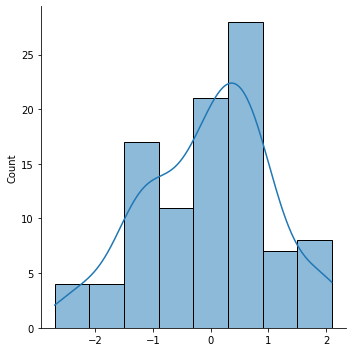

In [193]:
sns.displot(samples, kde=True)

例如，你可以用normal来得到一个标准正态分布的4×4样本数组：

In [194]:
normal_samples_2d = np.random.multivariate_normal(
    (0, 0), [[0.8, 0.05], [0.05, 0.7]], 100
)

In [195]:
normal_samples_2d = np.random.multivariate_normal((0, 0), [[1, 0.5], [0.5, 2]], 100)

下边进行核密度估计，并绘制三维图形：

In [196]:
import scipy.stats as st

In [197]:
values = np.vstack([normal_samples_2d[:, 0], normal_samples_2d[:, 1]])
kernel = st.gaussian_kde(values)

In [198]:
kernel

In [199]:
nX = 40
nY = 40
nXY = nX * nY
Xs = np.linspace(-3, 3, nX)
Ys = np.linspace(-3, 3, nY)
xx, yy = np.meshgrid(Xs, Ys)

In [200]:
xx

array([[-3.        , -2.84615385, -2.69230769, ...,  2.69230769,
         2.84615385,  3.        ],
       [-3.        , -2.84615385, -2.69230769, ...,  2.69230769,
         2.84615385,  3.        ],
       [-3.        , -2.84615385, -2.69230769, ...,  2.69230769,
         2.84615385,  3.        ],
       ...,
       [-3.        , -2.84615385, -2.69230769, ...,  2.69230769,
         2.84615385,  3.        ],
       [-3.        , -2.84615385, -2.69230769, ...,  2.69230769,
         2.84615385,  3.        ],
       [-3.        , -2.84615385, -2.69230769, ...,  2.69230769,
         2.84615385,  3.        ]])

In [201]:
yy

array([[-3.        , -3.        , -3.        , ..., -3.        ,
        -3.        , -3.        ],
       [-2.84615385, -2.84615385, -2.84615385, ..., -2.84615385,
        -2.84615385, -2.84615385],
       [-2.69230769, -2.69230769, -2.69230769, ..., -2.69230769,
        -2.69230769, -2.69230769],
       ...,
       [ 2.69230769,  2.69230769,  2.69230769, ...,  2.69230769,
         2.69230769,  2.69230769],
       [ 2.84615385,  2.84615385,  2.84615385, ...,  2.84615385,
         2.84615385,  2.84615385],
       [ 3.        ,  3.        ,  3.        , ...,  3.        ,
         3.        ,  3.        ]])

In [202]:
positions = np.vstack([yy.ravel(), xx.ravel()])

In [203]:
positions_kde = kernel(positions)

In [204]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

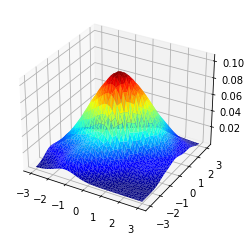

In [205]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_trisurf(
    xx.reshape(nXY),
    yy.reshape(nXY),
    positions_kde.reshape(nXY),
    cmap=cm.jet,
    linewidth=0.3,
)

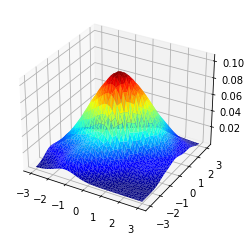

In [206]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_trisurf(
    xx.reshape(nXY),
    yy.reshape(nXY),
    positions_kde.reshape(nXY),
    cmap=cm.jet,
    linewidth=0.3,
)

我们说这些都是伪随机数，是因为它们都是通过算法基于随机数生成器种子，在确定性的条件下生成的。你可以用NumPy的np.random.seed更改随机数生成种子：

In [207]:
np.random.seed(2012)

一些常用的与随机数相关的函数：  
![img](figtabs/ch3/python_for_data_analysis_table4.8.png)

其他的一些随机数相关的代码：

In [208]:
import numpy as np

In [209]:
np.random.randn(2, 3)

array([[-0.18567139, -0.65194279, -0.40448317],
       [-1.56491342,  0.3392787 ,  0.08752461]])

Text(0.5, 1.0, 'Average height')

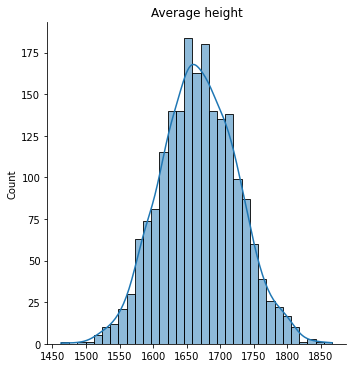

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(np.random.normal(1669, 56.3, 2000), kde=True)
plt.title("Average height")

In [211]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [212]:
sample_normal = np.random.normal(1669, 56.3, 2000)

((array([-3.39232293, -3.14126578, -3.00201262, ...,  3.00201262,
          3.14126578,  3.39232293]),
  array([1475.56506472, 1499.19374338, 1504.75552738, ..., 1855.13378854,
         1856.8448168 , 1867.90424048])),
 (58.550643663474965, 1670.6268510807142, 0.9998369673235883))

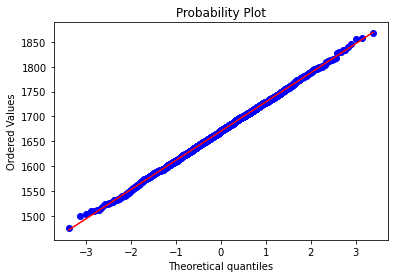

In [213]:
stats.probplot(sample_normal, dist="norm", plot=plt)

((array([-3.39232293, -3.14126578, -3.00201262, ...,  3.00201262,
          3.14126578,  3.39232293]),
  array([3.10761723e-03, 9.09899512e-03, 1.30880326e-02, ...,
         9.99019598e+00, 9.99396630e+00, 9.99508680e+00])),
 (2.825704152846395, 4.94305819577321, 0.9765871293742928))

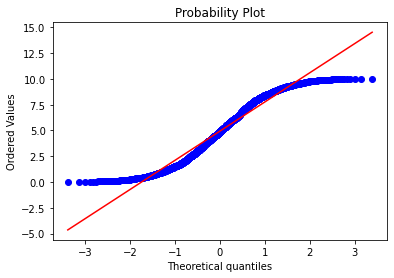

In [214]:
sample_unif = np.random.uniform(0, 10, 2000)
stats.probplot(sample_unif, dist="norm", plot=plt)

关于NumPy的更多介绍，建议参考[NumPy官方的中文文档](https://www.numpy.org.cn/)

在数值计算方面，除了NumPy之外，SciPy也不得不提，在前边的实验环节，也有所涉及（如核密度估计），当然，这也只是九牛一毛而已，更精彩的内容请小伙伴们自行练习，此处不展开。

<!--NAVIGATION-->
< [Python基础知识 B](ch02_python基础知识B.ipynb) | [Contents](Index.ipynb) | [数据挖掘常用模块B](ch03_数据挖掘常用模块B.ipynb)>